In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('polynomial_linear_regression.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [5]:
df.isnull().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


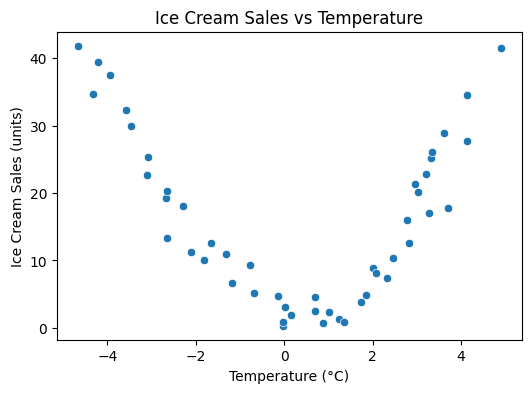

In [9]:
# plot the graph for checking the polynomial function
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Ice Cream Sales vs Temperature')
plt.show()

In [11]:
# separating the values for x and y
x = df['Temperature (°C)'].values.reshape(-1, 1)
y = df['Ice Cream Sales (units)']

this conversion is the main part of the polynomial fucntion linear regression model


In [12]:
# adding the polynomial feature to the x data
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)


In [21]:
# spliting the data into the training and testing dataets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=41)

In [22]:
# prompt: generate the linear regression model , train and test the model and return the accuracy percentage and value of all cost functions

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

accuracy_percentage = r2 * 100
print('Accuracy Percentage:', accuracy_percentage, '%')


Mean Squared Error: 9.452794796728451
Root Mean Squared Error: 3.074539769905156
R-squared: 0.9242753266356286
Accuracy Percentage: 92.42753266356286 %


In [23]:
print("training accuracy" , model.score(x_train, y_train))
print("testing accuracy" , model.score(x_test, y_test))

training accuracy 0.9325252866066233
testing accuracy 0.9242753266356286


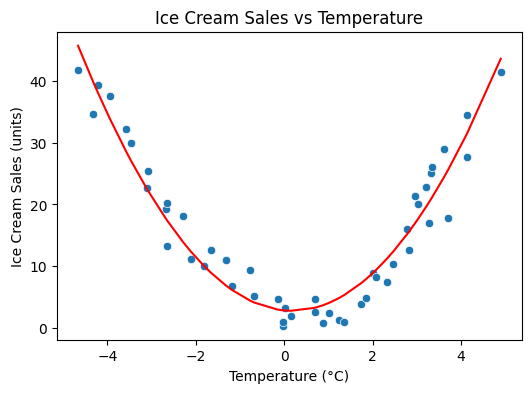

In [25]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df)
plt.plot(x, model.predict(x_poly), color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Ice Cream Sales vs Temperature')
plt.show()